In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle
import seaborn as sns

In [6]:
#creating a dataframe
dataframe = pd.read_csv(".\\dataset\\dataset\\train_.csv",nrows=1100000)

dataframe.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
#check for the description 
dataframe.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.100000e+06,1.100000e+06,1.100000e+06,1.099990e+06,1.099990e+06,1.100000e+06
mean,1.134213e+01,-7.252922e+01,3.993188e+01,-7.252844e+01,3.992605e+01,1.684450e+00
std,9.811510e+00,1.194800e+01,7.652505e+00,1.136068e+01,8.427425e+00,1.321998e+00
min,-4.500000e+01,-3.377681e+03,-3.116285e+03,-3.383297e+03,-3.114339e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073496e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075266e+01,-7.398014e+01,4.075317e+01,1.000000e+00
75%,1.250000e+01,-7.396712e+01,4.076713e+01,-7.396368e+01,4.076811e+01,2.000000e+00
max,5.000000e+02,2.522271e+03,2.621628e+03,1.717003e+03,1.989728e+03,2.080000e+02


In [8]:
#checking for the null values
dataframe.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

<AxesSubplot:>

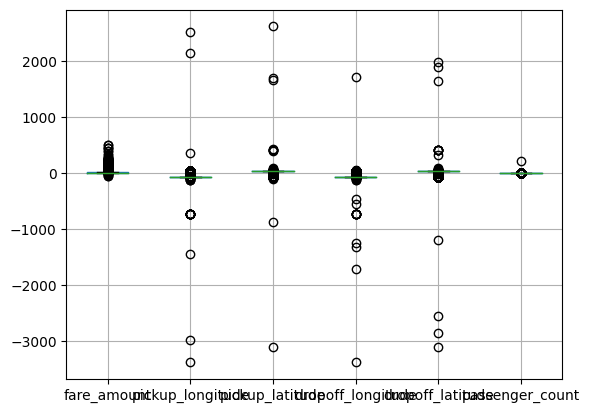

In [126]:
dataframe.boxplot()
plt.xticks(rotation=45)

In [9]:
#removing the null values
dataframe = dataframe.dropna(how='any',axis = 0)

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099990 entries, 0 to 1099999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1099990 non-null  object 
 1   fare_amount        1099990 non-null  float64
 2   pickup_datetime    1099990 non-null  object 
 3   pickup_longitude   1099990 non-null  float64
 4   pickup_latitude    1099990 non-null  float64
 5   dropoff_longitude  1099990 non-null  float64
 6   dropoff_latitude   1099990 non-null  float64
 7   passenger_count    1099990 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 75.5+ MB


In [11]:
#again check for the null values
dataframe.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

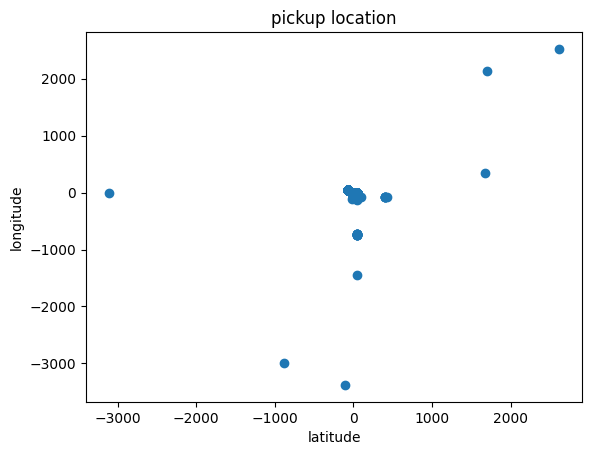

In [12]:
#EDA
plt.scatter(x = dataframe['pickup_latitude'],y=dataframe['pickup_longitude'])
plt.title("pickup location")
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

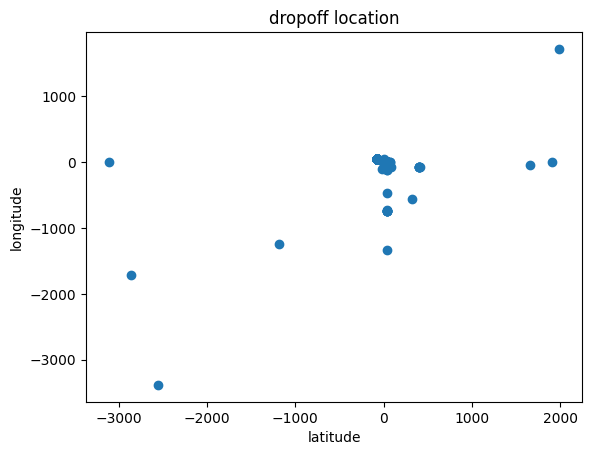

In [13]:
plt.scatter(x = dataframe['dropoff_latitude'],y=dataframe['dropoff_longitude'])
plt.title("dropoff location")
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [14]:
#drop the latitude and longitude out of the range
def remove_outliers(dataframe):
    idx5 = dataframe[(dataframe['fare_amount']<=0)|(dataframe['fare_amount']>=250)].index
    dataframe.drop(idx5,axis=0,inplace=True)

    idx6 = dataframe[dataframe['passenger_count']>6].index
    dataframe.drop(idx6,axis=0,inplace=True)

    idx1 = dataframe[(dataframe['pickup_latitude']<40)| (dataframe['pickup_latitude']>45)].index
    dataframe.drop(idx1,axis=0,inplace=True)

    idx2 = dataframe[(dataframe['dropoff_latitude']<40)| (dataframe['dropoff_latitude']>45)].index
    dataframe.drop(idx2,axis=0,inplace=True)

    #longitude
    idx3 = dataframe[(dataframe['pickup_longitude']<-75)| (dataframe['pickup_longitude']>-72)].index
    dataframe.drop(idx3,axis=0,inplace=True)

    idx4 = dataframe[(dataframe['dropoff_longitude']<-75)| (dataframe['dropoff_longitude']>-72)].index
    dataframe.drop(idx4,axis=0,inplace=True)
    return dataframe

#Calling the above function 
dataframe = remove_outliers(dataframe)
dataframe.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [15]:
def diff(dataframe):
    dataframe['dis_longitude'] = abs(dataframe['pickup_longitude']-dataframe['dropoff_longitude'])
    dataframe['dis_latitude'] = abs(dataframe['pickup_latitude']-dataframe['dropoff_latitude'])
    return dataframe

dataframe = diff(dataframe)

In [16]:
def deg2rad(df):
    return (df*np.pi)/180

#converting the feature from degree to radian
dataframe[['dis_longitude','dis_latitude']]= dataframe[['dis_longitude','dis_latitude']].pipe(deg2rad)
#

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'fare_amount'),
  Text(2, 0, 'pickup_longitude'),
  Text(3, 0, 'pickup_latitude'),
  Text(4, 0, 'dropoff_longitude'),
  Text(5, 0, 'dropoff_latitude'),
  Text(6, 0, 'passenger_count'),
  Text(7, 0, 'dis_longitude'),
  Text(8, 0, 'dis_latitude')])

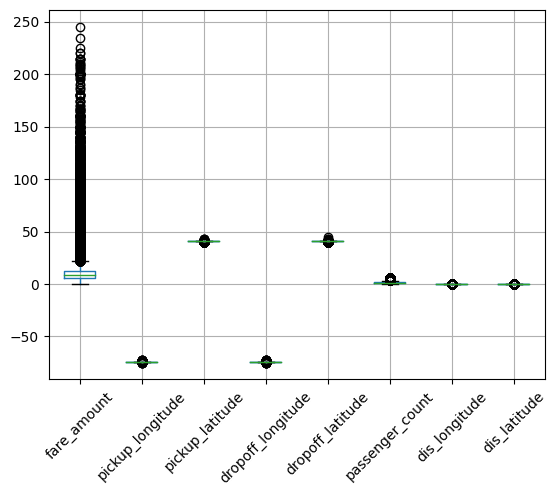

In [17]:
dataframe.boxplot()
plt.xticks(rotation=45)
plt.show()

In [18]:
#heaversine distance

def distance(df):
    R_earth = 6371
    a = np.sin(df['dis_latitude']/2.0)**2 + np.cos(df['pickup_latitude']) * np.cos(df['dropoff_latitude']) * np.sin(df['dis_longitude']/2.0)**2
    return 2 * R_earth * np.arcsin(np.sqrt(a))

#adding the he2aversine distance to the dataframe
dataframe['haver_dist'] = distance(dataframe)

In [19]:
dataframe.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dis_longitude,dis_latitude,haver_dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.000047,0.000158,1.048560
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.000642,0.001234,8.852247
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.000148,0.000187,1.518365
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.000077,0.000435,2.817336
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.000200,0.000275,2.163320


In [20]:
#convert the datetime format
def extract_data(dataframe):
    dataframe['pickup_datetime']= pd.to_datetime(dataframe['pickup_datetime'],format="%Y-%m-%d %H:%M:%S UTC")
    dataframe['year'] = dataframe.pickup_datetime.dt.year
    dataframe['month'] = dataframe.pickup_datetime.dt.month
    dataframe['day'] = dataframe.pickup_datetime.dt.day
    dataframe['weekday'] = dataframe.pickup_datetime.dt.weekday
    dataframe['hour'] = dataframe.pickup_datetime.dt.hour
    dataframe['month_name'] = dataframe.pickup_datetime.dt.month_name()
    dataframe['day_name'] = dataframe.pickup_datetime.dt.day_name()
    return dataframe

#To extract date  time months from the feature
dataframe = extract_data(dataframe)

Lets do Some Analysis of data

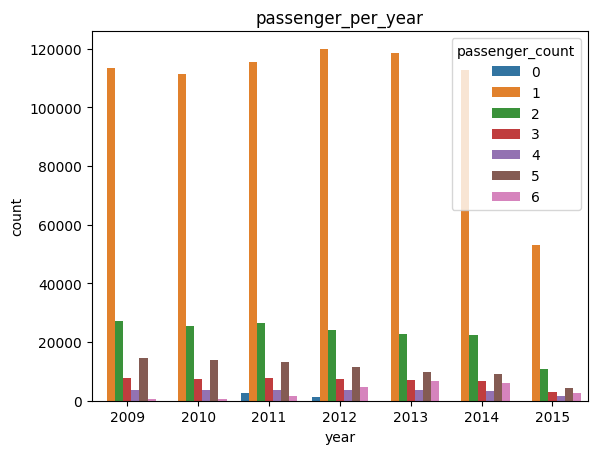

In [26]:
passenger_per_year = dataframe.groupby(['year','passenger_count'])['passenger_count'].count().reset_index(name = 'count')
sns.barplot(x = 'year',y = 'count',data = passenger_per_year,hue='passenger_count')
plt.title("passenger_per_year")
plt.show()

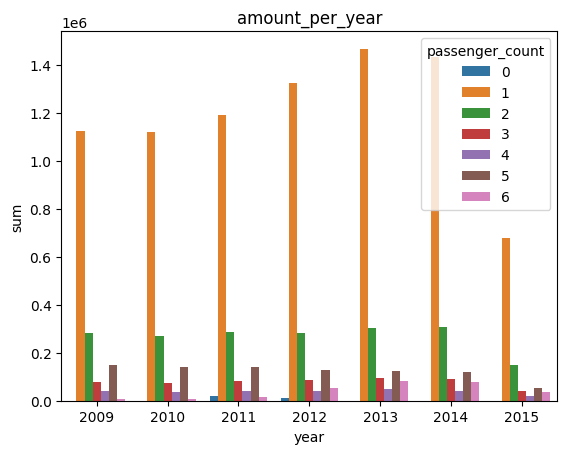

In [29]:
amount_per_year = dataframe.groupby(['year','passenger_count'])['fare_amount'].sum().reset_index(name = 'sum')
sns.barplot(x = 'year',y = 'sum',data = amount_per_year,hue='passenger_count')
plt.title("amount_per_year")
plt.show()

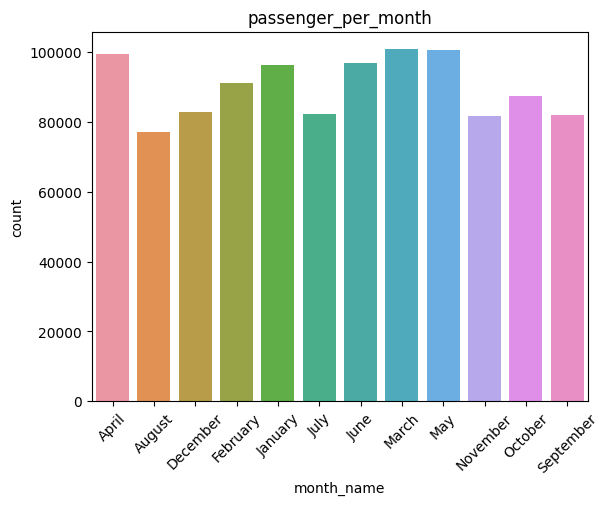

In [33]:
passenger_per_month = dataframe.groupby('month_name')['passenger_count'].count().reset_index(name = 'count')
sns.barplot(x = 'month_name',y = 'count',data = passenger_per_month)
plt.title("passenger_per_month")
plt.xticks(rotation =45)
plt.show()

In [57]:
dataframe = dataframe.drop(['month_name','day_name','key','pickup_datetime'],axis = 1)

In [58]:
dataframe.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dis_longitude,dis_latitude,haver_dist,year,month,day,weekday,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1.048560,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,8.852247,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,1.518365,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,2.817336,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,2.163320,2010,3,9,1,7


<AxesSubplot:>

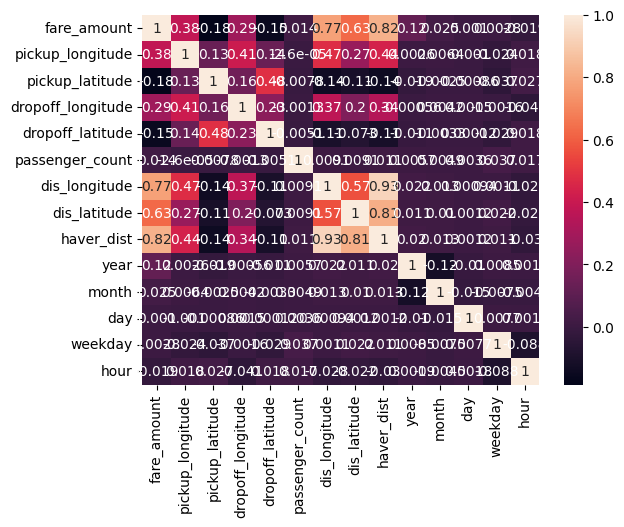

In [143]:
import seaborn as sns
sns.heatmap(dataframe.corr(),annot = True,)

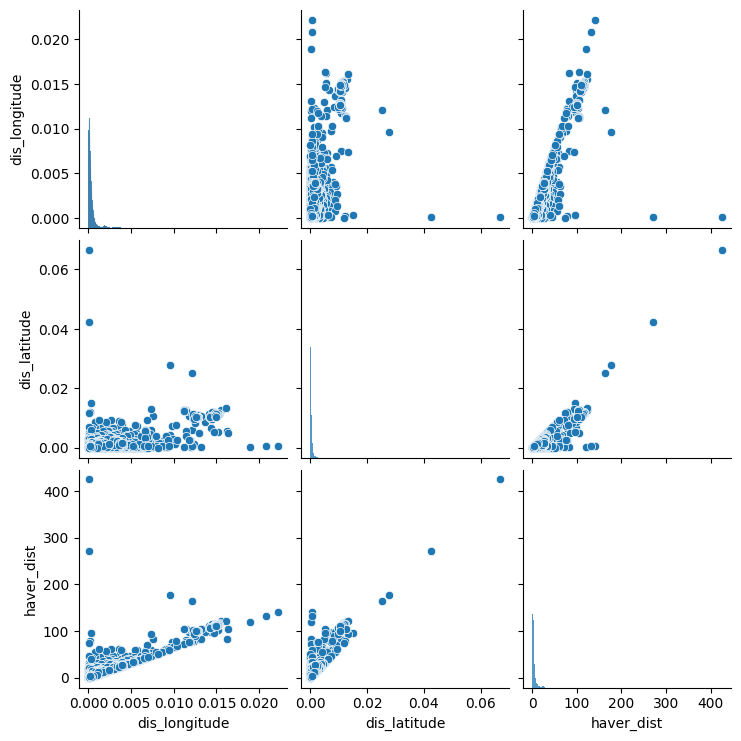

In [144]:
sns.pairplot(dataframe[['dis_longitude','dis_latitude','haver_dist']])

In [60]:
X  = dataframe.drop('fare_amount',axis=1)
Y = dataframe['fare_amount']

In [61]:
#splitting the dataset into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [71]:
from sklearn.metrics import r2_score,mean_squared_error

def models(model_name,X_train,Y_train,X_test,Y_test,collinearity):
    if collinearity == True:  #if there is collinearity and dont want to drop it then
        X_train = X_train
        name = "col"
    else:
       X_train =  X_train.drop(['dis_longitude','dis_latitude'],axis = 1)
       X_test = X_test.drop(['dis_longitude','dis_latitude'],axis = 1)
       name = "noncol"
        
    if model_name =='rf':
        model = RandomForestRegressor(n_estimators=10,n_jobs=-1)
        forest_regrees = model.fit(X_train,Y_train)
        with open(f".\\model_weight_{name}.pb","wb") as file:
            pickle.dump(forest_regrees,file)
        predict = forest_regrees.predict(X_test)
        predict_out = math.sqrt(mean_squared_error(Y_test,predict))
        return predict_out, r2_score(Y_test,predict)
    
    elif model_name=='dt':
        model = DecisionTreeRegressor()
        tree = model.fit(X_train,Y_train)
        with open(f".\\model_weight_{name}.pb","wb") as file:
            pickle.dump(tree,file)
        pred = tree.predict(X_test)
        predict_out = math.sqrt(mean_squared_error(Y_test,pred))
        return predict_out, r2_score(Y_test,pred)


In [72]:
#calling the functio to train the model before removing the multicollinearity
rmse,r2 = models('dt',X_train,Y_train,X_test,Y_test,collinearity=True)
print(f"the rmse is {rmse}\nr2_score is {r2}")

the rmse is 5.283480629673013
r2_score is 0.6980897175281437


In [73]:
#removing the higly correlated features
new_Df = dataframe
X1 = new_Df.drop('fare_amount',axis = 1)
Y1 = new_Df[['fare_amount']]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.1)

#calling the function to train the model after removing the multicollinearity
rmse,r2 = models('dt',X_train,Y_train,X_test,Y_test,collinearity=False)
print(f"rmse is {rmse}\nr2_score is {r2}")

rmse is 5.358665563247043
r2_score is 0.6915607661305483


In [125]:
#test on another file
test_df = pd.read_csv(".\\dataset\\dataset\\test.csv")
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [126]:
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
test_df = diff(dataframe)
test_df[['dis_longitude','dis_latitude']]= test_df[['dis_longitude','dis_latitude']].pipe(deg2rad)
test_df['haver_dist'] = distance(dataframe)
test_df = extract_data(test_df)
test_df = diff(test_df)
test_df = test_df.drop(['key','pickup_datetime'],axis=1)




In [ ]:
#predicting the  result on the unseen data
#for collinear model
def test_unseen(test_df,collinear):
    if collinear == True:
        loaded_model = pickle.load(open(".\\model_weight_col.pb", 'rb'))
    else:
        loaded_model = pickle.load(open(".\\model_weight_noncol.pb", 'rb'))

    result = loaded_model.predict(test_df)
    result = pd.DataFrame(result,columns=['prediction'])# pd.concat([test_df,result],axis =1 ).tail()
    return result

result_df = test_unseen(test_df,collinear=True)

In [134]:
#lets merge the dataframe
result_df['index'] = result_df.index
test_df['index'] = test_df.index
final_output = pd.merge(result_df,test_df,on='index',how = 'inner')
final_output.drop('index',axis = 1,inplace=True)
final_output.head()

,prediction,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dis_longitude,dis_latitude,haver_dist,year,month,day,weekday,hour
0,4.1,-73.844311,40.721319,-73.841610,40.712278,1,0.000047,0.000158,1.048560,2009,6,15,0,17
1,19.7,-74.016048,40.711303,-73.979268,40.782004,1,0.000642,0.001234,8.852247,2010,1,5,1,16
2,7.7,-73.982738,40.761270,-73.991242,40.750562,2,0.000148,0.000187,1.518365,2011,8,18,3,0
3,7.3,-73.987130,40.733143,-73.991567,40.758092,1,0.000077,0.000435,2.817336,2012,4,21,5,4
4,10.5,-73.968095,40.768008,-73.956655,40.783762,1,0.000200,0.000275,2.163320,2010,3,9,1,7
